In [1]:
import os
import tarfile
import urllib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
HOUSING_PATH = os.path.join("datasets","housing")

In [3]:
def fetch_tar_data(from_path=DOWNLOAD_ROOT, to_path=HOUSING_PATH):
    if not os.path.isdir(to_path):
        os.makedirs(to_path)
    tgz_path = os.path.join(to_path,"housing.tgz")
    urllib.request.urlretrieve(from_path, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=to_path)
    housing_tgz.close()

In [4]:
fetch_tar_data()

In [5]:
import pandas as pd

In [6]:
def load_housing_data(from_path = HOUSING_PATH):
    return pd.read_csv(os.path.join(HOUSING_PATH,"housing.csv"))

In [85]:
housing = load_housing_data()

In [86]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


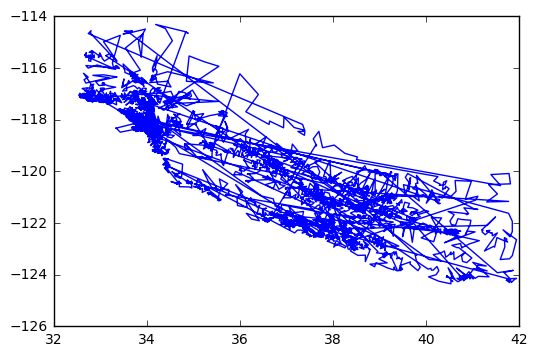

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


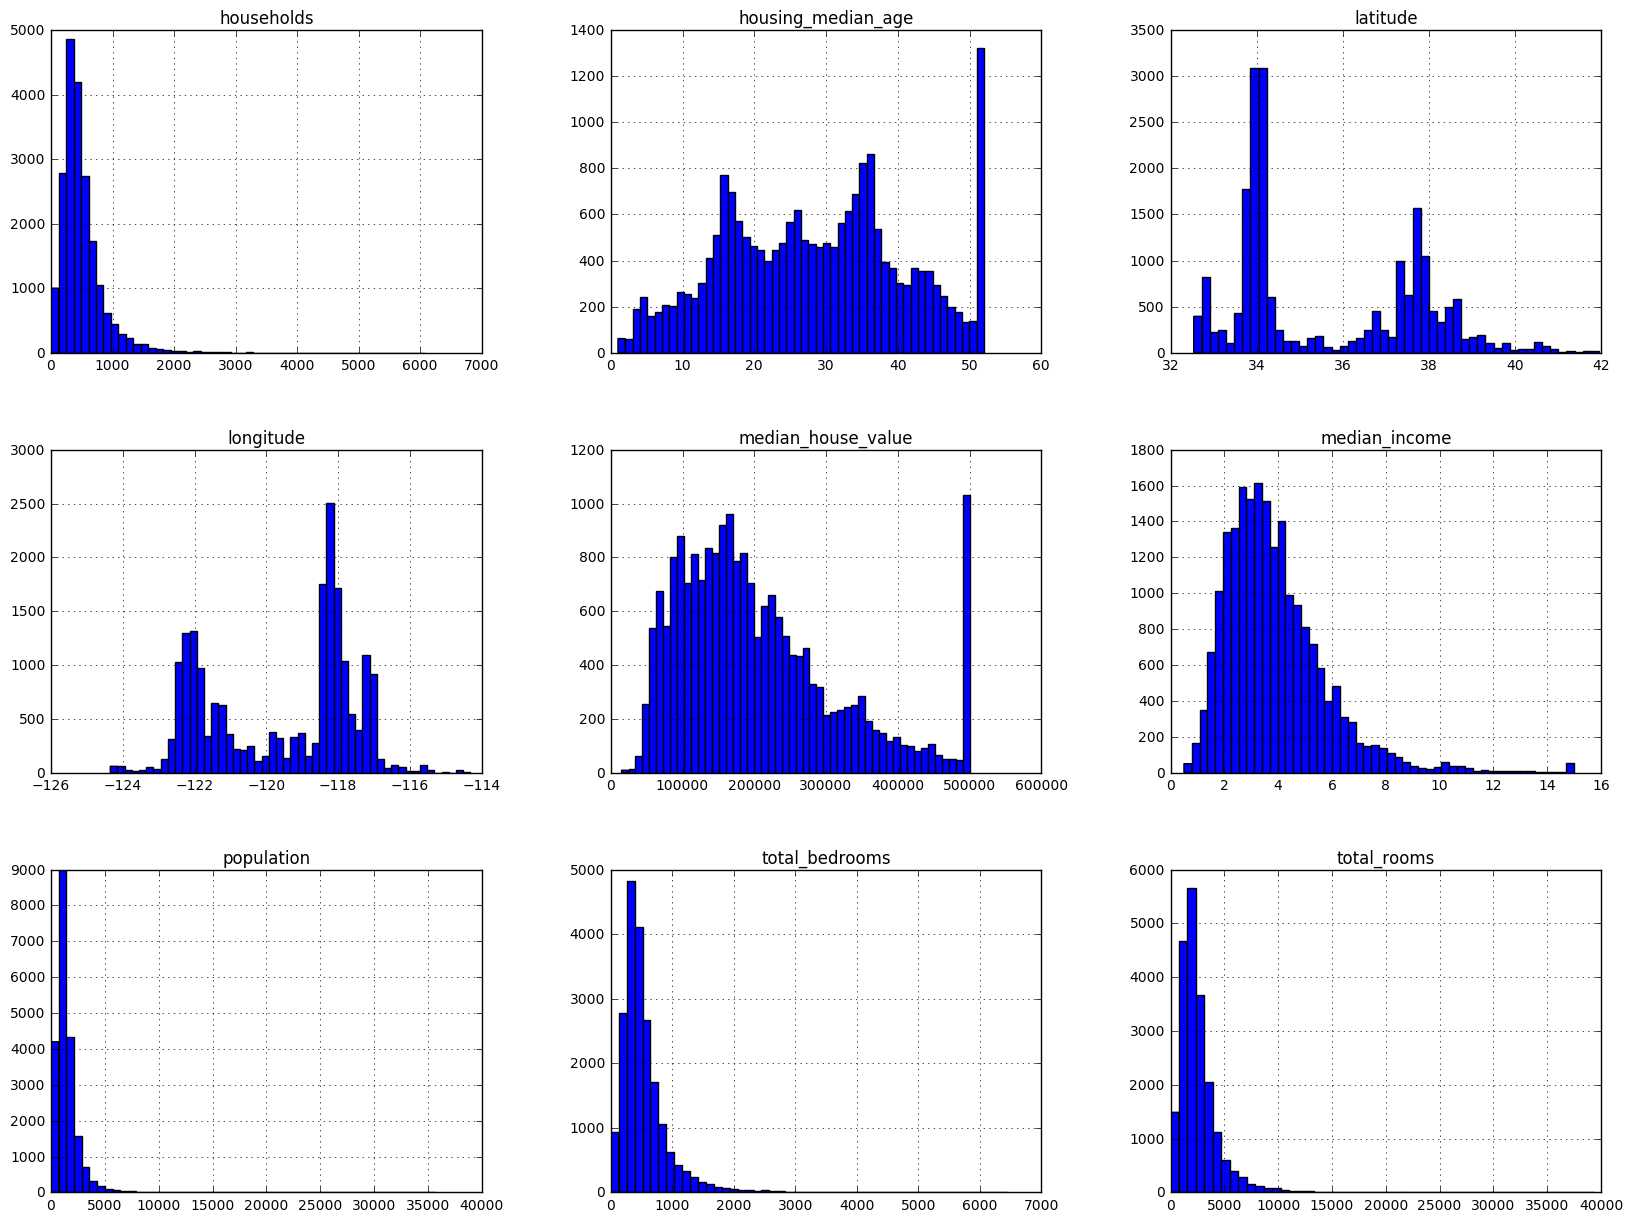

In [87]:
import matplotlib.pyplot as plt
plt.plot(housing['latitude'],housing['longitude'])
plt.show()

housing['ocean_proximity'].value_counts()

housing.describe()

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [88]:
#Create Test Data:
#Must be proper representation of data set
#Let's say median_income is the most important attribute, so the test data should be a equal representative of all starta
#But since median_income is continous, we make it into discrete data

In [89]:
#categorizing median_income value
housing['cat_income'] = np.ceil(housing['median_income']/1.5)

In [90]:
housing['cat_income'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: cat_income, dtype: int64

In [91]:
#We will use this feature as the feature upon which we stratified split for Test data set
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
splt = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_idx, test_idx in splt.split(housing,housing['cat_income']):        #note that this returns a generator object
    train_strat = housing.loc[train_idx]
    test_strat = housing.loc[test_idx]

In [92]:
#housing.info()

In [93]:
#test_strat.hist(bins=50, figsize=(20,15))
#plt.show()

In [94]:
#drop the cat_income column

for set_ in (train_strat,test_strat):
    set_.drop('cat_income',axis=1, inplace = True)

In [95]:
housing_train = train_strat.copy()

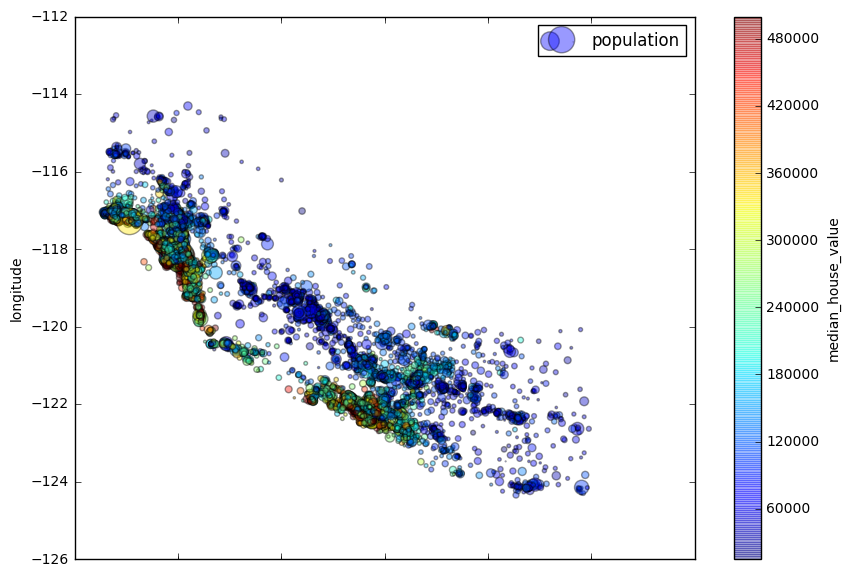

In [100]:
housing_train.plot(kind='scatter',x="latitude", y="longitude", alpha=0.4,
                  s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.show()